In [ ]:
# Predict if person has diabetes or not

In [4]:
# Load sklearn dataset

In [5]:
from sklearn import datasets

In [6]:
# Load the dataset
diabetes = datasets.load_diabetes()

In [8]:
# Work with provided csv diabetes dataset

In [9]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
# load the csv file
df = pd.read_csv('diabetes.csv')

# the first 5 rows of data
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# number of rows & columns
df.shape

(768, 9)

In [14]:
# revise and remove duplicates 
df.drop_duplicates(inplace = True)

In [16]:
# display the missing values (NAN, NaN, na) 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [18]:
# all rows from the first eight columns of the dataset
X = dataset[:,0:8] 

# all rows from the last column, yes(1) or no (0) diabetes
y = dataset[:,8] 

In [24]:
# scale all feature values in vector X to have values between 0 and 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [25]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [26]:
# create the architecture of NN with 3 layers
model = Sequential([
    Dense(12, activation='relu', input_shape=( 8 ,)), # 12 neurons
    Dense(15, activation='relu'), # 15 neurons
    Dense(1, activation='sigmoid') # 1 neuron
])

In [27]:
# compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
# train (fit) the model
# batch - total number of training examples present in a single batch
hist = model.fit(X_train, y_train,batch_size=57, epochs=1000, validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4329 - accuracy: 0.7923 - val_loss: 0.5013 - val_accuracy: 0.7561
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.7923 - val_loss: 0.5013 - val_accuracy: 0.7561
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4337 - accuracy: 0.7963 - val_loss: 0.5015 - val_accuracy: 0.7480
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.7923 - val_loss: 0.5028 - val_accuracy: 0.7480
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.7963 - val_loss: 0.5015 - val_accuracy: 0.7561
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4335 - accuracy: 0.7902 - val_loss: 0.5017 - val_accuracy: 0.7480
Epoch 7/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.4328 - accuracy: 0.7902 - val_loss: 0.5033 - val_accuracy: 0.7561
Epoch 8/1000
9/9 [==

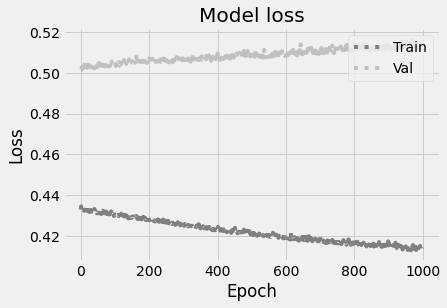

In [33]:
# visualize the training loss and the validation loss to see if the model is overfitting

plt.plot(hist.history['loss'], color='grey', linestyle='dotted')
plt.plot(hist.history['val_loss'], color='silver', linestyle='dotted')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

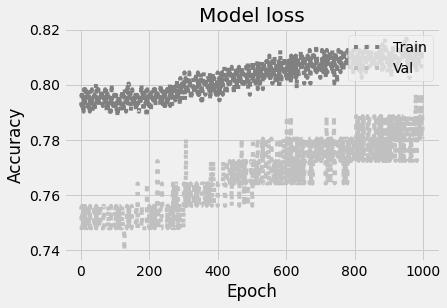

In [34]:
plt.plot(hist.history['accuracy'], color='grey', linestyle='dotted')
plt.plot(hist.history['val_accuracy'], color='silver', linestyle='dotted')
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [35]:
# make a prediction & print the actual values

prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

5/5 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [36]:
# evaluate the model on the train data set

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] # threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       398
         1.0       0.75      0.67      0.71       216

    accuracy                           0.81       614
   macro avg       0.79      0.77      0.78       614
weighted avg       0.80      0.81      0.80       614

Confusion Matrix: 
 [[351  47]
 [ 72 144]]

Accuracy:  0.8061889250814332



In [37]:
# evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       102
         1.0       0.64      0.69      0.67        52

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix: 
 [[82 20]
 [16 36]]

Accuracy:  0.7662337662337663



In [40]:
# the model accurately identified people as having diabetes or not with 75.9 % accuracy on the test data
model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7662


0.7662337422370911